# Part I - Loan Data Exploration
## by Lucas Leal da Silva

## Introduction
This project is about exploring and providing insights about a dataset containing 113,937 loans.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# reducing the number of columns of the dataset to only interesting ones for this project
interest_columns = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
                    'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus',
                    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'TotalCreditLinespast7years',
                    'DelinquenciesLast7Years', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)',
                    'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanKey', 'LoanCurrentDaysDelinquent',
                    'LoanOriginalAmount']
loans = loans[interest_columns]

# change column names to snake case for better code aesthetic
loans.columns = ['listing_creation_date', 'term', 'loan_status', 'borrower_apr',
                 'borrower_rate', 'prosper_score', 'listing_category', 'occupation',
                 'employment_status', 'employment_status_duration', 'is_borrower_homeowner',
                 'total_credit_lines_past_7years', 'delinquencies_last_7years', 'available_bankcard_credit',
                 'trades_never_delinquent_rate', 'income_range', 'stated_monthly_income', 'income_verifiable',
                 'loan_key', 'loan_current_days_delinquent', 'loan_original_amount']


In [4]:
# printing structural informations about the dataset
print(loans.shape)
loans.info()

(113937, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_creation_date           113937 non-null  object 
 1   term                            113937 non-null  int64  
 2   loan_status                     113937 non-null  object 
 3   borrower_apr                    113912 non-null  float64
 4   borrower_rate                   113937 non-null  float64
 5   prosper_score                   84853 non-null   float64
 6   listing_category                113937 non-null  int64  
 7   occupation                      110349 non-null  object 
 8   employment_status               111682 non-null  object 
 9   employment_status_duration      106312 non-null  float64
 10  is_borrower_homeowner           113937 non-null  bool   
 11  total_credit_lines_past_7years  113240 non-null  float64
 12  del

In [5]:
loans.head(5)

,listing_creation_date,term,loan_status,borrower_apr,borrower_rate,prosper_score,listing_category,occupation,employment_status,employment_status_duration,...,total_credit_lines_past_7years,delinquencies_last_7years,available_bankcard_credit,trades_never_delinquent_rate,income_range,stated_monthly_income,income_verifiable,loan_key,loan_current_days_delinquent,loan_original_amount
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,0,Other,Self-employed,2.0,...,12.0,4.0,1500.0,0.81,"$25,000-49,999",3083.333333,True,E33A3400205839220442E84,0,9425
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,7.0,2,Professional,Employed,44.0,...,29.0,0.0,10266.0,1.00,"$50,000-74,999",6125.000000,True,9E3B37071505919926B1D82,0,10000
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,0,Other,Not available,NaN,...,3.0,0.0,NaN,NaN,Not displayed,2083.333333,True,6954337960046817851BCB2,0,3001
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,9.0,16,Skilled Labor,Employed,113.0,...,29.0,14.0,30754.0,0.76,"$25,000-49,999",2875.000000,True,A0393664465886295619C51,0,10000
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,4.0,2,Executive,Employed,44.0,...,49.0,0.0,695.0,0.95,"$100,000+",9583.333333,True,A180369302188889200689E,0,15000


In [6]:
loans.describe()

,term,borrower_apr,borrower_rate,prosper_score,listing_category,employment_status_duration,total_credit_lines_past_7years,delinquencies_last_7years,available_bankcard_credit,trades_never_delinquent_rate,stated_monthly_income,loan_current_days_delinquent,loan_original_amount
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,106312.000000,113240.000000,112947.000000,106393.000000,106393.000000,1.139370e+05,113937.000000,113937.00000
mean,40.830248,0.218828,0.192764,5.950067,2.774209,96.071582,26.754539,4.154984,11210.225447,0.885897,5.608026e+03,152.816539,8337.01385
std,10.436212,0.080364,0.074818,2.376501,3.996797,94.480605,13.637871,10.160216,19818.361309,0.148179,7.478497e+03,466.320254,6245.80058
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000
25%,36.000000,0.156290,0.134000,4.000000,1.000000,26.000000,17.000000,0.000000,880.000000,0.820000,3.200333e+03,0.000000,4000.00000
50%,36.000000,0.209760,0.184000,6.000000,1.000000,67.000000,25.000000,0.000000,4100.000000,0.940000,4.666667e+03,0.000000,6500.00000
75%,36.000000,0.283810,0.250000,8.000000,3.000000,137.000000,35.000000,3.000000,13180.000000,1.000000,6.825000e+03,0.000000,12000.00000
max,60.000000,0.512290,0.497500,11.000000,20.000000,755.000000,136.000000,99.000000,646285.000000,1.000000,1.750003e+06,2704.000000,35000.00000


In [7]:
# changing variable types to help visualizations
loans.listing_creation_date = pd.to_datetime(loans.listing_creation_date)

# Mapping the listing categories to their respective values
listing_categories_map = {
    0: 'Not Available', 1: 'Debt Consolidation',
    2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
    5: 'Student Use', 6: 'Auto', 7: 'Other',
    8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
    11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses',
    14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle',
    17: 'RV', 18: 'Taxes', 19: 'Vacation',  20: 'Wedding Loans'
}
loans['listing_category'] = loans.listing_category.map(listing_categories_map)


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   listing_creation_date           113937 non-null  datetime64[ns]
 1   term                            113937 non-null  int64         
 2   loan_status                     113937 non-null  object        
 3   borrower_apr                    113912 non-null  float64       
 4   borrower_rate                   113937 non-null  float64       
 5   prosper_score                   84853 non-null   float64       
 6   listing_category                113937 non-null  object        
 7   occupation                      110349 non-null  object        
 8   employment_status               111682 non-null  object        
 9   employment_status_duration      106312 non-null  float64       
 10  is_borrower_homeowner           113937 non-null  bool   

In [9]:
loans.income_range.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [10]:
# convert income_range into ordered categorical variable
categories_order = ['Not displayed', 'Not employed', '$0', '$1-24,999',
                    '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=categories_order)
loans['income_range'] = loans['income_range'].astype(ordered_var)

In [11]:
loans.listing_creation_date.min(), loans.listing_creation_date.max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

### What is the structure of your dataset?

The dataset is composed by 113,937 loans taken between 09/11/2005 and 10/03/2014, with 81 columns available for each of the registers. As a manner to simplify how we handle with the dataset, I reduced the dataset to 21 columns that I think that can be used for the purpose of this project.

Most of the columns are with numeric nature regarding the loan and the borrower, with some of them being rates, some of them being integers about periods. Also, we have boolean and string variables regarding the characterization of the borrower.

### What is/are the main feature(s) of interest in your dataset?

My interest in this dataset is to discover which are the factors that can mostly affect if a loan is payed on time, delayed or not payed at all. This discoveries could be used in the future to improve a risk score system, or fraud prevention for loan companies.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the things that can mostly affect the payment or not of a loan could be related with the employment status of the borrower (as people with monthly income have manners to pay their debts), the reason why the loan is being made, and also the historical of the borrower (if available) could be a good predictor of his future financial behaviors.

## Univariate Exploration

I'll start by looking at distribution of the variable of interest: *loan_status*.

In [12]:
def set_title_labels_plot(title, xlabel='', ylabel='', xticks_rotate=False):
    """ Set the title, xlabel, ylabel and xticks rotation of a plot. """
    plt.title(title);
    
    if xlabel != '':
        plt.xlabel(xlabel);
    
    if ylabel != '':
        plt.ylabel(ylabel);

    if xticks_rotate:
        plt.xticks(rotation=45)

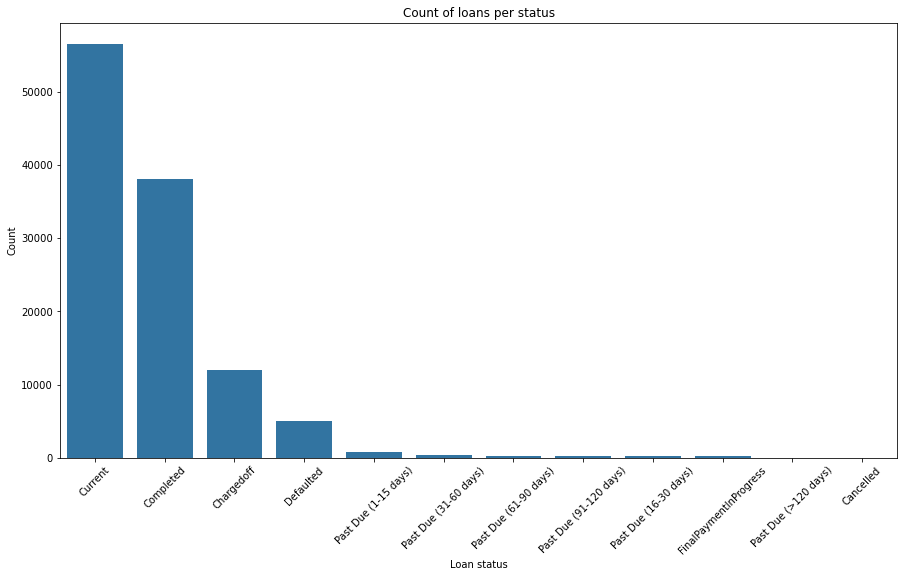

In [13]:
plt.figure(figsize=(15, 8))

base_color = sb.color_palette()[0]

sb.countplot(data=loans, x='loan_status', order=loans.loan_status.value_counts().index, color=base_color)
plt.xticks(rotation=45)
set_title_labels_plot('Count of loans per status', 'Loan status', 'Count')

It seems that most of the loans are either *current* or *completed* by a high difference to the third status, *charged off*.

We can focus the plot to see only the smaller categories, especifically the ones related to *past due* that can be later used to see trends in behavior of borrowers.

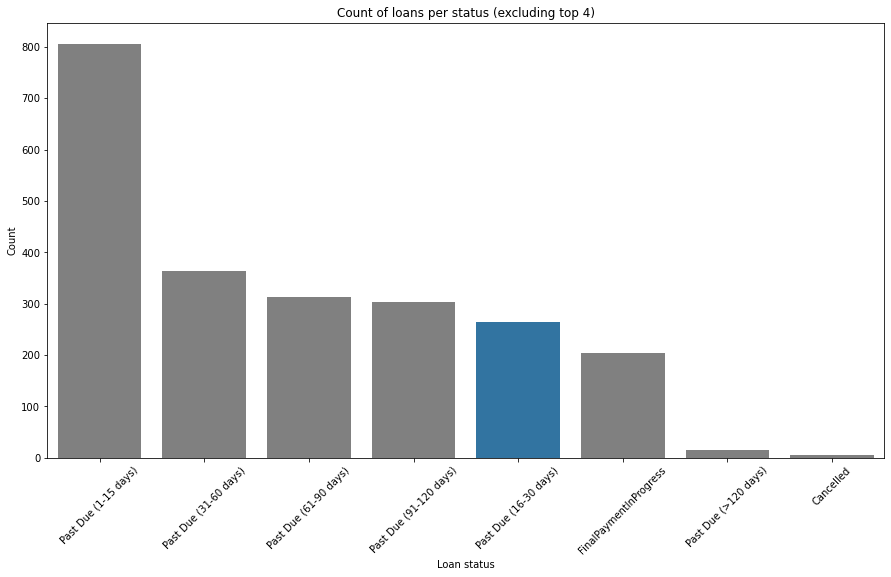

In [14]:
bigger_categories = ["Current", "Completed", "Chargedoff", "Defaulted"]

smaller_categories_loans = loans.query('loan_status not in @bigger_categories')

custom_palette = ['grey' if status != 'Past Due (16-30 days)' else base_color  for status in smaller_categories_loans.loan_status.value_counts().index]

plt.figure(figsize=(15, 8))
cp = sb.countplot(data=smaller_categories_loans, x='loan_status',
             order=smaller_categories_loans.loan_status.value_counts().index,
             color=base_color,
             palette=custom_palette)

set_title_labels_plot('Count of loans per status (excluding top 4)', 'Loan status', 'Count', True)

By this plot excluding the top 4 *loan status*, we can see an interesting (and expected) behavior: the biggest status is the loans past due between 1 and 15 days, and it decreases gradually as the period of delay on the payment increases. The only exception is the past due between 16 and 30 days, that are bigger only than greater than 120 days.

This interesting fact can be an indicative that most of people that loses the payment deadline are actually paying the debt after 16 and before 30 days. We can look further on this fact by checking the *loan current days delinquent* to see if the distribution reduces during this observed period.

In [15]:
def calculate_bins(dataframe, column, bin_size):
    """ Calculate and return a list of bins to be used on a histogram, given a dataset, a column and a bin size. """
    bins = np.arange(dataframe[column].min(), dataframe[column].max() + bin_size, bin_size)
    return bins

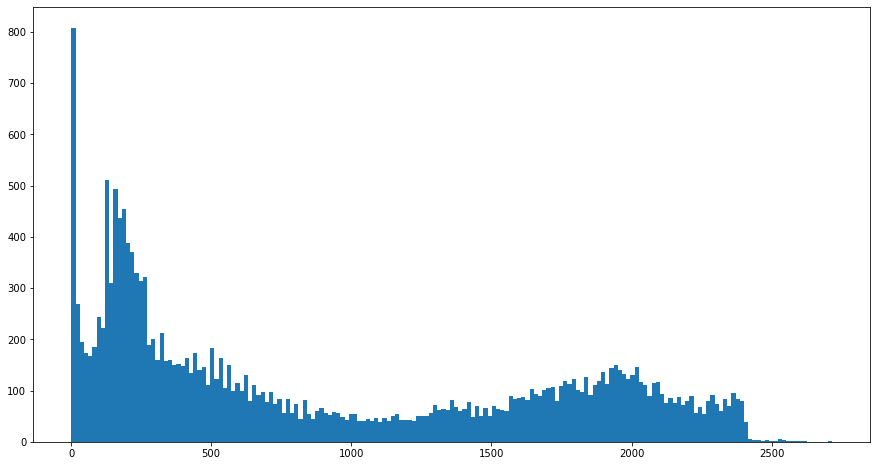

In [16]:
# first of all, we need to remove the ones with 0 delinquent days, as they are current loans, or payed ones.
delinquent_loans = loans.query('loan_current_days_delinquent > 0')

plt.figure(figsize=(15, 8))

bins = calculate_bins(delinquent_loans, 'loan_current_days_delinquent', 15)
plt.hist(data=delinquent_loans, x='loan_current_days_delinquent', bins=bins);

Plotting a histogram with bin size of 15 days can show us what we expected: during the first 15 days of delay we have the highest concentration of loans, and then drastically reduces after 15 days until 60 days, and raises again after 120 days. Another interesting fact is that around 300 it starts to reduce and stabilize around 100 loans per bin, but it starts to grow again after 1500 days. Then, around 2400 days we have a sudden cut, with very small amount of loans.

This can be related to how the data is spread through the years in the dataset. Maybe for the first year we have just a small amount of data compared to the other years. We can check the distribution of loans through time to confirm it, or maybe detect some outliers/incorrect registers.

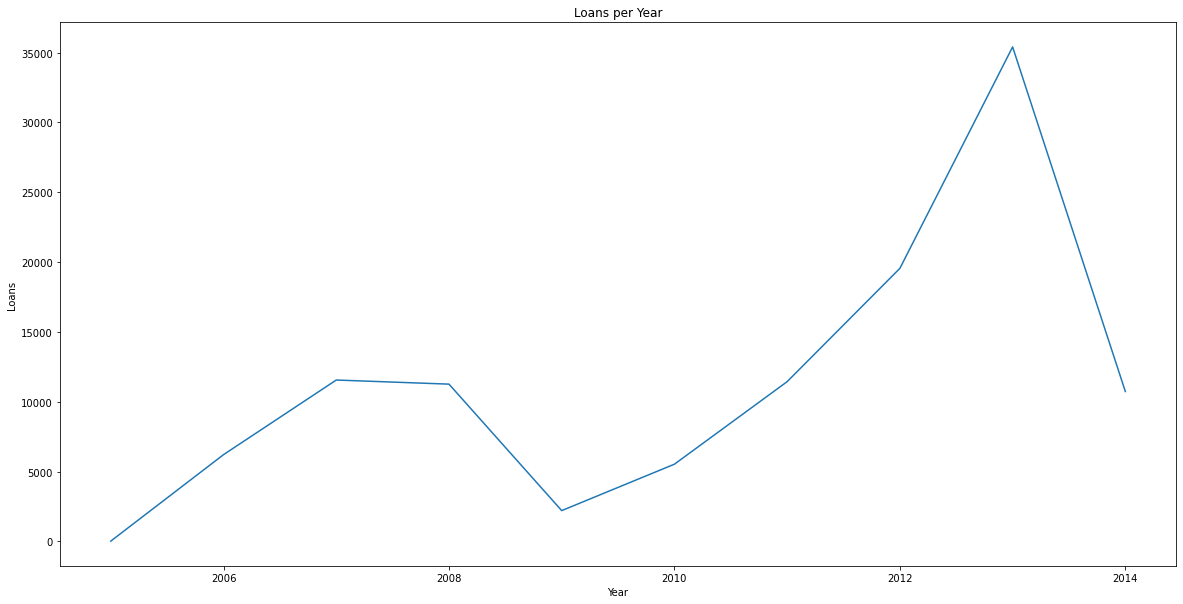

In [17]:
loans['creation_year'] = loans.listing_creation_date.dt.year

plt.figure(figsize=(20, 10))
sb.lineplot(data=loans.creation_year.value_counts())
set_title_labels_plot('Loans per Year', 'Year', 'Loans')

In [18]:
loans.query('loan_current_days_delinquent > 2000').listing_creation_date.dt.date.value_counts()

2007-07-30    12
2007-02-20    11
2007-05-15    11
2007-03-07    11
2007-02-27    11
              ..
2006-08-19     1
2006-06-20     1
2006-06-15     1
2007-09-02     1
2008-06-23     1
Name: listing_creation_date, Length: 735, dtype: int64

As expected, in 2005 we have almost zero records of loans in the dataset, and none of them were delinquent. The number of records grows between 2005 and 2007 to 13500, and then falls again on 2009. After 2010 it starts to grow almost exponentially until 2013, and then falls again on 2014. Another interesting fact is that, although 2007 and 2008 have almost the same number of loans recorded on the dataset, if we look at the loans delinquent for more than 2000 days, the number of delinquent loans are almost 100% higher for the first year. This could be related to the financial crisis that happened in those two years, especially that people that got loans on 2007 and then suffered with the crisis couldn't pay also in 2008, and took longer to recover than the ones taking the loan one year after.

Now, instead of aggregate the loans by year, we can see them aggregated by the month, and maybe see more facts.

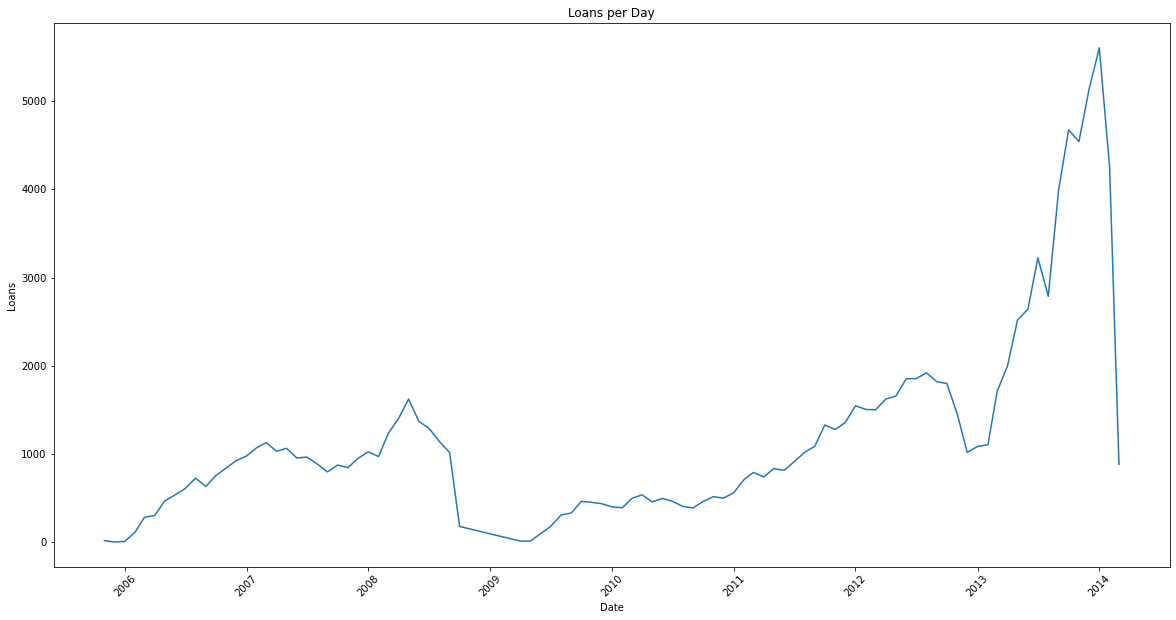

In [19]:
plt.figure(figsize=(20, 10))
sb.lineplot(data=loans.listing_creation_date.dt.to_period('M').dt.to_timestamp().value_counts())
set_title_labels_plot('Loans per Day', 'Date', 'Loans', True)

Unfortunately, aggregating the loans by month does not gives us any greater insight, especially because we don't have similar amounts of loans recorded for each year. By first sight, there is no big trend between years (like raising and decreasing the number of loans depending on the period of the year).

Now, another important factor we can take a look is the listing category, one variable that I believe that can have impact on the behavior of the borrower regarding paying or delaying the loan.

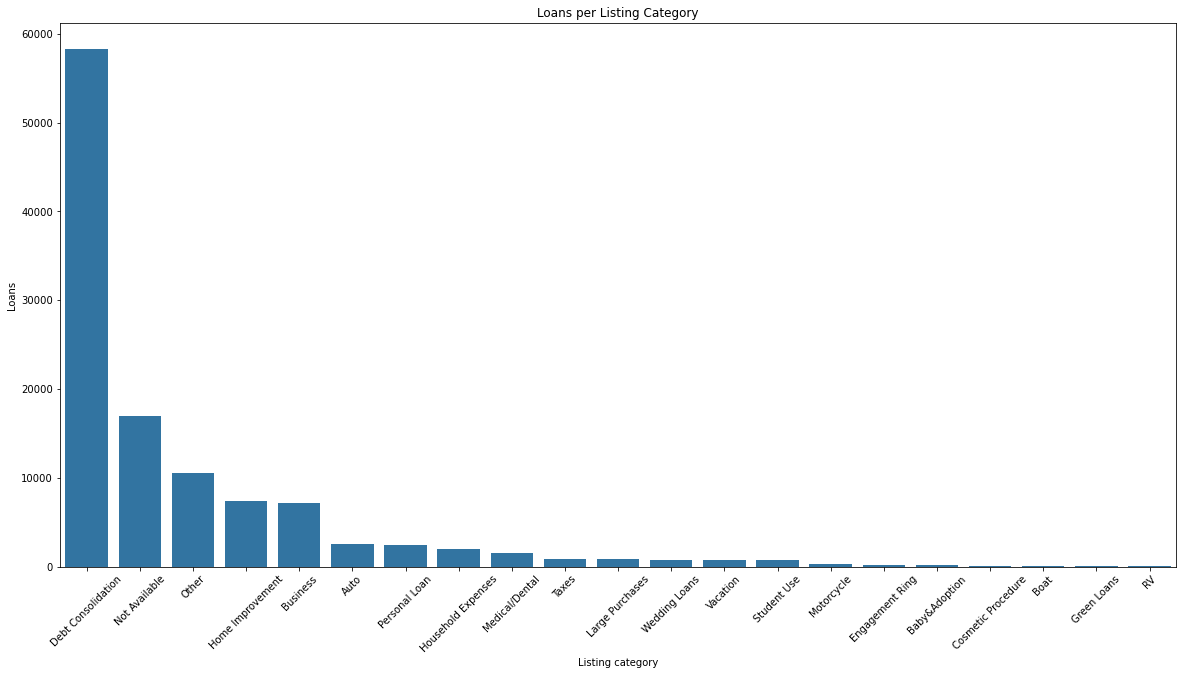

In [20]:
plt.figure(figsize=(20, 10))
sb.countplot(data=loans,
             x='listing_category',
             order=loans.listing_category.value_counts().index,
             color=base_color)

set_title_labels_plot('Loans per Listing Category', 'Listing category', 'Loans', True)

By far the category with most loans is the **debt consolidation**. This is an interesting discovery, that can be further investigated looking at it distribution through the years, and maybe it's relation to the 2008 financial crisis. Also, it may be related with the occupation status of the borrowers, maybe unemployed borrowers with high credit available or high credit card expenses were fired recently, and now they need loans to pay their debts. Also, crossing the listing category with the payment rate could show us which categories are less risky (I would say categories related to family expenses like home improvement, student use, wedding and children are more reliable than material/cosmetic expenses).

Now, we can see the distribution regarding the amount of money borrowed.

In [21]:
loans.loan_original_amount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: loan_original_amount, dtype: float64

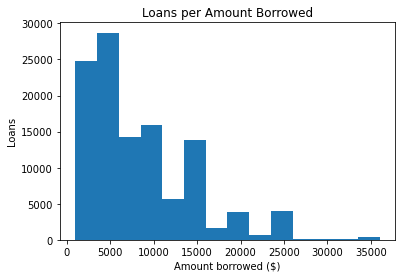

In [22]:
bins = calculate_bins(loans, 'loan_original_amount', 2500)
plt.hist(data=loans, x='loan_original_amount', bins=bins)
set_title_labels_plot('Loans per Amount Borrowed', 'Amount borrowed ($)', 'Loans')

At first glance, it looks like a right-skewed distribution, but not so regular. It seems that people tend to request loans with amount multiple of $5000 (like 5,000, 10,000 and 15,000) rather than other random amounts in between. Also, there are just a few number of loans with amount higher than $25,000, with a slightly increase around $35,000.

We can reduce the size of the bins to check if this insight is correct.

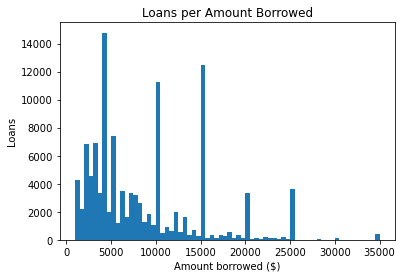

In [23]:
bins = calculate_bins(loans, 'loan_original_amount', 500)
plt.hist(data=loans, x='loan_original_amount', bins=bins)
set_title_labels_plot('Loans per Amount Borrowed', 'Amount borrowed ($)', 'Loans')

Confirming the thought about the amounts, we can see that the loans multiple of $5,000 are the most popular ones, with the only exception for the bin with $4,000. Let's take a closer look on these loans to see if the high amount is natural, or due to some kind of problem in our dataset.

In [24]:
sum(loans.duplicated())

0

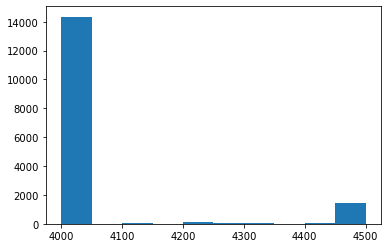

In [25]:
loans_4000 = loans.query('4000 <= loan_original_amount <= 4500')
bins = calculate_bins(loans_4000, 'loan_original_amount', 50)
plt.hist(data=loans_4000, x='loan_original_amount', bins=bins);

In [26]:
loans_4000[loans_4000.loan_key.duplicated()]

,listing_creation_date,term,loan_status,borrower_apr,borrower_rate,prosper_score,listing_category,occupation,employment_status,employment_status_duration,...,delinquencies_last_7years,available_bankcard_credit,trades_never_delinquent_rate,income_range,stated_monthly_income,income_verifiable,loan_key,loan_current_days_delinquent,loan_original_amount,creation_year
4942,2013-09-26 09:35:36.317,36,Current,0.35356,0.3134,2.0,Other,Laborer,Employed,336.0,...,56.0,798.0,0.56,"$50,000-74,999",4583.333333,True,8D84369399064302947D8B5,0,4000,2013
8683,2013-11-25 08:46:13.073,36,Current,0.20524,0.1685,10.0,Baby&Adoption,Accountant/CPA,Employed,49.0,...,0.0,8793.0,0.90,"$25,000-49,999",2114.916667,True,371F37048358378544DD238,0,4000,2013
9102,2014-01-12 08:01:41.417,36,Current,0.27817,0.2394,1.0,Debt Consolidation,Other,Employed,43.0,...,0.0,141.0,1.00,"$25,000-49,999",2750.000000,True,A60D3706798482961713F7D,0,4000,2014
10401,2013-09-12 12:53:22.680,36,Current,0.29537,0.2566,7.0,Debt Consolidation,Nurse (RN),Employed,75.0,...,0.0,1713.0,1.00,"$75,000-99,999",6406.666667,True,5AF43694216641568D16E61,0,4000,2013
13445,2014-01-14 18:13:03.870,60,Current,0.26514,0.2394,3.0,Debt Consolidation,NaN,Other,1.0,...,17.0,2108.0,0.82,"$1-24,999",976.000000,True,02D137079845719197ACFE8,0,4000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110587,2013-10-03 12:19:26.540,36,Current,0.32436,0.2849,4.0,Debt Consolidation,Computer Programmer,Employed,43.0,...,1.0,1535.0,0.66,"$1-24,999",1833.333333,True,2DCA3695734609163F0625A,0,4000,2013
112413,2014-02-10 16:59:57.720,60,Current,0.21858,0.1940,8.0,Business,Professional,Employed,26.0,...,0.0,7678.0,1.00,"$50,000-74,999",5833.333333,True,F1663705723312635E6D948,0,4000,2014
112854,2014-03-02 14:35:58.973,36,Current,0.21176,0.1745,4.0,Debt Consolidation,NaN,Other,23.0,...,0.0,4330.0,1.00,"$25,000-49,999",2500.000000,True,B8C437068650458819A6848,0,4000,2014
112924,2013-12-21 10:38:45.070,36,Current,0.18275,0.1465,4.0,Home Improvement,Other,Employed,138.0,...,0.0,1511.0,1.00,"$25,000-49,999",2500.000000,True,F1593705279683639804D61,0,4000,2013


In [27]:
loans_4000.query('loan_key == "8D84369399064302947D8B5"')

,listing_creation_date,term,loan_status,borrower_apr,borrower_rate,prosper_score,listing_category,occupation,employment_status,employment_status_duration,...,delinquencies_last_7years,available_bankcard_credit,trades_never_delinquent_rate,income_range,stated_monthly_income,income_verifiable,loan_key,loan_current_days_delinquent,loan_original_amount,creation_year
1803,2013-09-26 09:35:36.317,36,Current,0.35356,0.3134,3.0,Other,Laborer,Employed,336.0,...,56.0,798.0,0.56,"$50,000-74,999",4583.333333,True,8D84369399064302947D8B5,0,4000,2013
4942,2013-09-26 09:35:36.317,36,Current,0.35356,0.3134,2.0,Other,Laborer,Employed,336.0,...,56.0,798.0,0.56,"$50,000-74,999",4583.333333,True,8D84369399064302947D8B5,0,4000,2013


In [28]:
loans.query('loan_key == "F3E73698701527272D54247"')

,listing_creation_date,term,loan_status,borrower_apr,borrower_rate,prosper_score,listing_category,occupation,employment_status,employment_status_duration,...,delinquencies_last_7years,available_bankcard_credit,trades_never_delinquent_rate,income_range,stated_monthly_income,income_verifiable,loan_key,loan_current_days_delinquent,loan_original_amount,creation_year
37400,2013-09-17 11:44:43.177,36,Current,0.2129,0.176,4.0,Debt Consolidation,NaN,Other,0.0,...,11.0,3019.0,0.62,"$25,000-49,999",2500.0,True,F3E73698701527272D54247,0,4000,2013
113636,2013-09-17 11:44:43.177,36,Current,0.2129,0.176,6.0,Debt Consolidation,NaN,Other,0.0,...,11.0,3019.0,0.62,"$25,000-49,999",2500.0,True,F3E73698701527272D54247,0,4000,2013


By the cases above, we can see that we have duplicated loans in our dataset, which is a wrangling problem. The only column that seems to be different between them is the `prosper_score`. This probably is related to some problem in the way the system recorded the loan, maybe by some characteristic of the prosper or something that we cannot distinguish with the current dataset.

To solve this problem, I'll drop the duplicated records, maintaining the ones with lower **prosper score** as a pessimistic way of solve the problem.

In [29]:
subset = loans.columns.tolist()
subset.remove('prosper_score')
loans_clean = loans.sort_values('prosper_score', ascending=True).drop_duplicates(subset)

loans_clean.shape

(113066, 22)

Dropping the duplicates removed 871 records from our initial dataset. May not be a huge difference, but depending on the analysis it can be important in the next steps.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The first variable of interest it the `loan_status`, that showed us most of loans are either ongoing (by the time the data was recorded) or finished. But if we take a closer look on the other categories (especially the due ones), we can see that the amount of loans reduce when the due time increases, with exception for the period 15 to 30 days.

Also, when we look at the amount of loans distributed by the years, we can see a very heterogeneous behavior, which can make the analysis of brute numbers not so reliable. For the next steps, maybe is interesting take a closer look on rates and averages rather than just count, as we have different amounts through the years.

When analyzing the amount borrowed per loan, we found an interesting trend: people ask more for loans with initial amount multiple of $5,000. The exception here was the peak of loans with $4,000 amount, that showed to be natural on the dataset, but led me to find out there was duplicated data.

Other than that, I didn't find any other unusual point for now, and the dataset seems tidy and clean enough to go on with the next steps of the project.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For now, the only problem identified on the dataset is the duplication of 871 records, having the only difference between them the `prosper_score` field. This can be due to a problem in the system that calculated the prosper score, recording the loan with different values for the borrower. As I am not able to identify the problem with the dataset available, my solution for it was remove the duplicated lines, keeping the ones with lowest score (pessimist/safe approach). This was my choice due to the kind of data I'm dealing: financial companies tend to be careful about their customers, and having lower scores for the prosper means we can be more cautious about the deals we made, and reduce financial loss.

## Bivariate Exploration

To start, I want to see the average amount of loans per listing category.

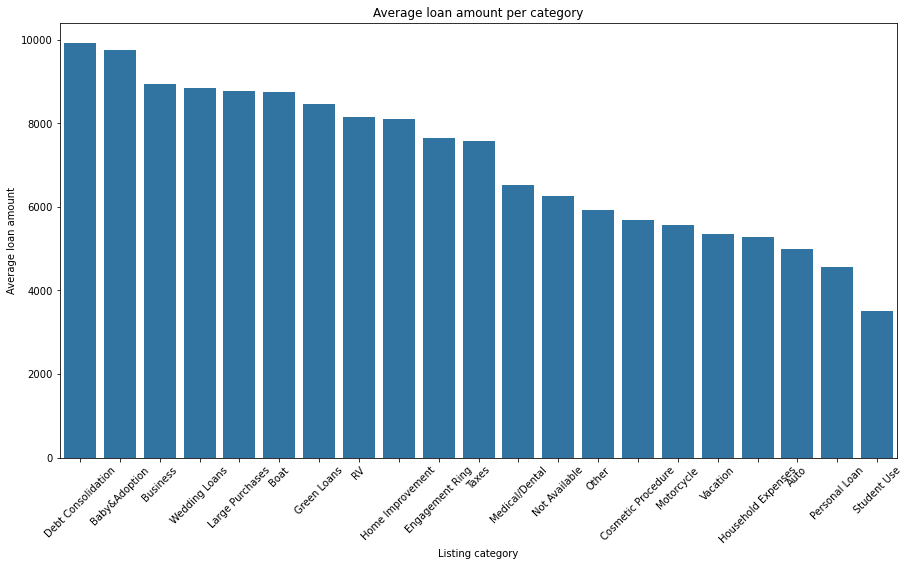

In [30]:
plt.figure(figsize=(15, 8))

categories_order = loans.groupby('listing_category').mean()['loan_original_amount'].sort_values(ascending=False).index
sb.barplot(data=loans, x='listing_category', y='loan_original_amount', color=base_color, order=categories_order, ci=False)

set_title_labels_plot('Average loan amount per category', 'Listing category', 'Average loan amount', True)

With this, we can see that although the lowest category (*student use*) is a little less than half of the highest category (*debt consolidation*), the reduction is gradual between the classes, reducing less than $1,000 when we sort by the average amount per category. Another interesting fact is that when we looked only for the count of loans per category, the highest one by far was *debt consolidation*, and now we can see that it also has the highest average of money lent.

The second (*baby & adoption*) and the forth (*wedding loans*) are related to family expenses, so let's take a closer look if my initial thought about loans related to family have higher chances for being payed. For this, we can cross the categories with the amount of loans in each status.

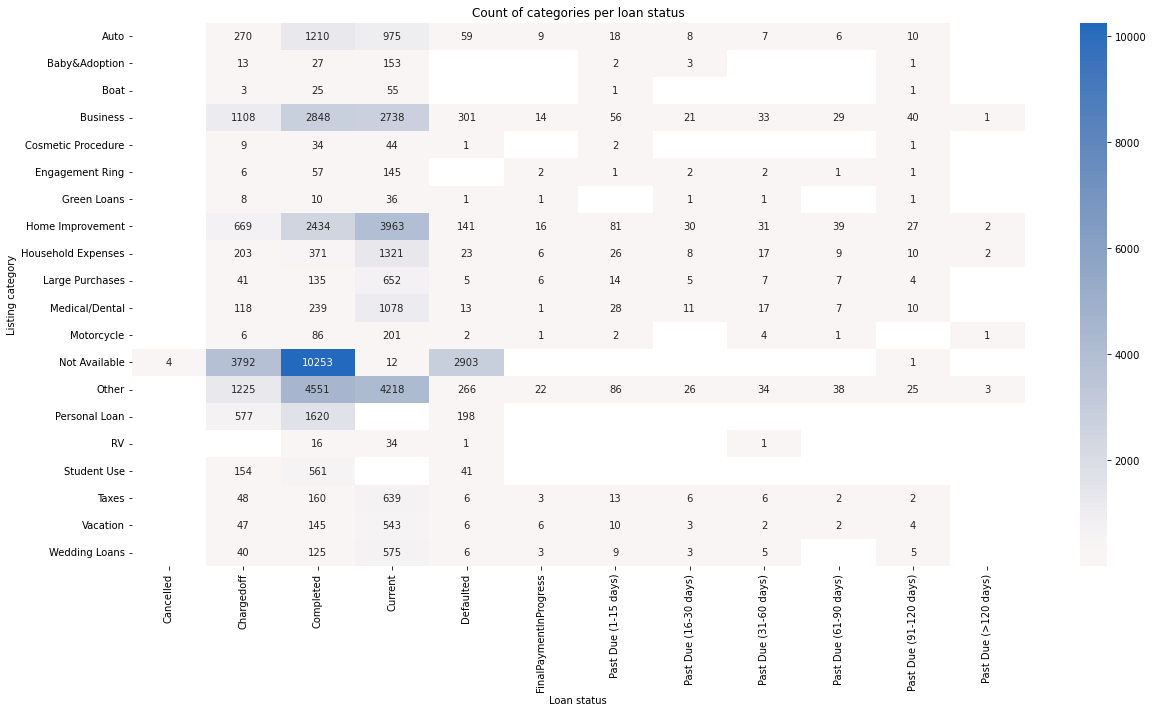

In [31]:
plt.figure(figsize=(20, 10))

# Filtering the status, and also removing "Debt Consolidation" as it was so much higher than the others
filtered_loans = loans.query('listing_category != "Debt Consolidation"')
groupped_loans = filtered_loans.groupby(['listing_category', 'loan_status']).count().reset_index()[['listing_category', 'loan_status', 'loan_key']]
pivotted_loans = pd.pivot_table(groupped_loans, values='loan_key', index='listing_category', columns='loan_status')

sb.heatmap(data=pivotted_loans, annot=True, cmap='vlag_r', center=0, fmt = '.0f')
set_title_labels_plot('Count of categories per loan status', 'Loan status', 'Listing category')

By the heatmap above, we can see something interesting: although the second biggest category was *Not Available* by our previous bar chart, it has only one past due loan. In contrast, the third biggest category, *Others*, has 86 past due loans only in the first status, what is expected. 

Now, we can also cross the *income range* with the *loan status* to see if we can have some insight about the profile of the people that cross the payment deadlines.

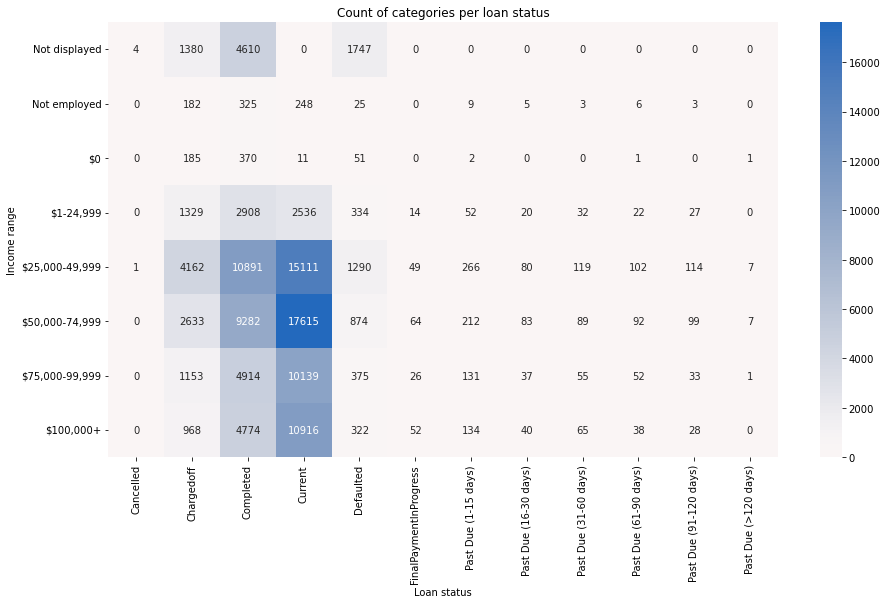

In [32]:
groupped_loans = loans.groupby(['income_range', 'loan_status']).count().reset_index()[['income_range', 'loan_status', 'loan_key']]
pivotted_loans = pd.pivot_table(groupped_loans, values='loan_key', index='income_range', columns='loan_status')

plt.figure(figsize=(15, 8))

sb.heatmap(data=pivotted_loans, annot=True, cmap='vlag_r', center=0, fmt = '.0f')
set_title_labels_plot('Count of categories per loan status', 'Loan status', 'Income range')

We can see that clearly most of the loans in the dataset are current or completed, with a high concentration of loans in the two intermediate *income range*: $25,000-49,999 and $50,000-74,999.

Still about the *income range* of the borrowers, now I'm interested to see how the *prosper score* is distributed through the different income ranges, and see if there is a correlation between one and another.

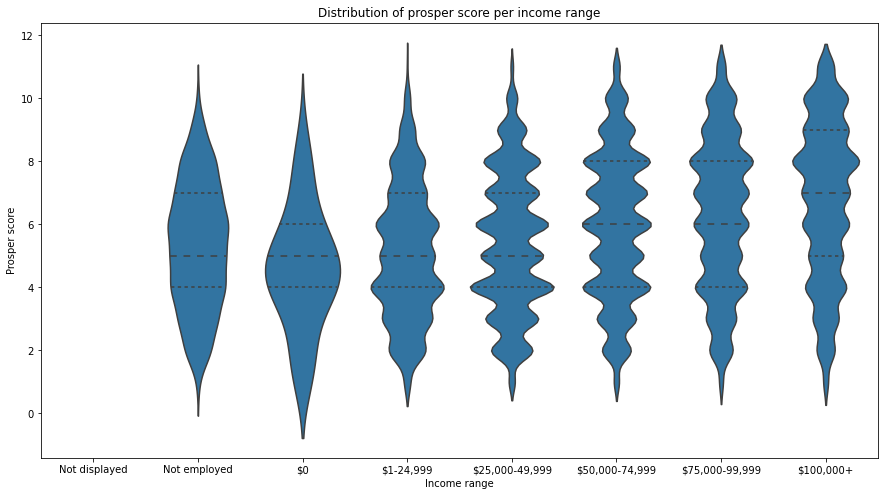

In [33]:
plt.figure(figsize=(15, 8))
sb.violinplot(data=loans, x='income_range', y='prosper_score', color=base_color, inner='quartiles')
set_title_labels_plot('Distribution of prosper score per income range', 'Income range', 'Prosper score')

The distribution of *prosper score* per *income ranges* has a curious shape: in the first two categories with some data ("not employed" and $0), it is some how regular, with the shape growing in the middle and getting thinner in the extremes. But the next ranges, especially between $25,000 and $74,999 the plots starts to grow and shrink each 1 point in the score, suggesting that the scores tend to be multiple of 1. Also, from the second until the fifth category we have a stable median at 5, it goes to 6 in the sixth and seventh categories, and then to 7 for the last category. As the *prosper score* is based on the past records, we can assume that there's a tendency of the higher is the income range of the prosper, the higher is his score, therefore there is a lower risk in lending money to them.

To finish, we can see how is the correlation (if is there any) between the numeric variables.

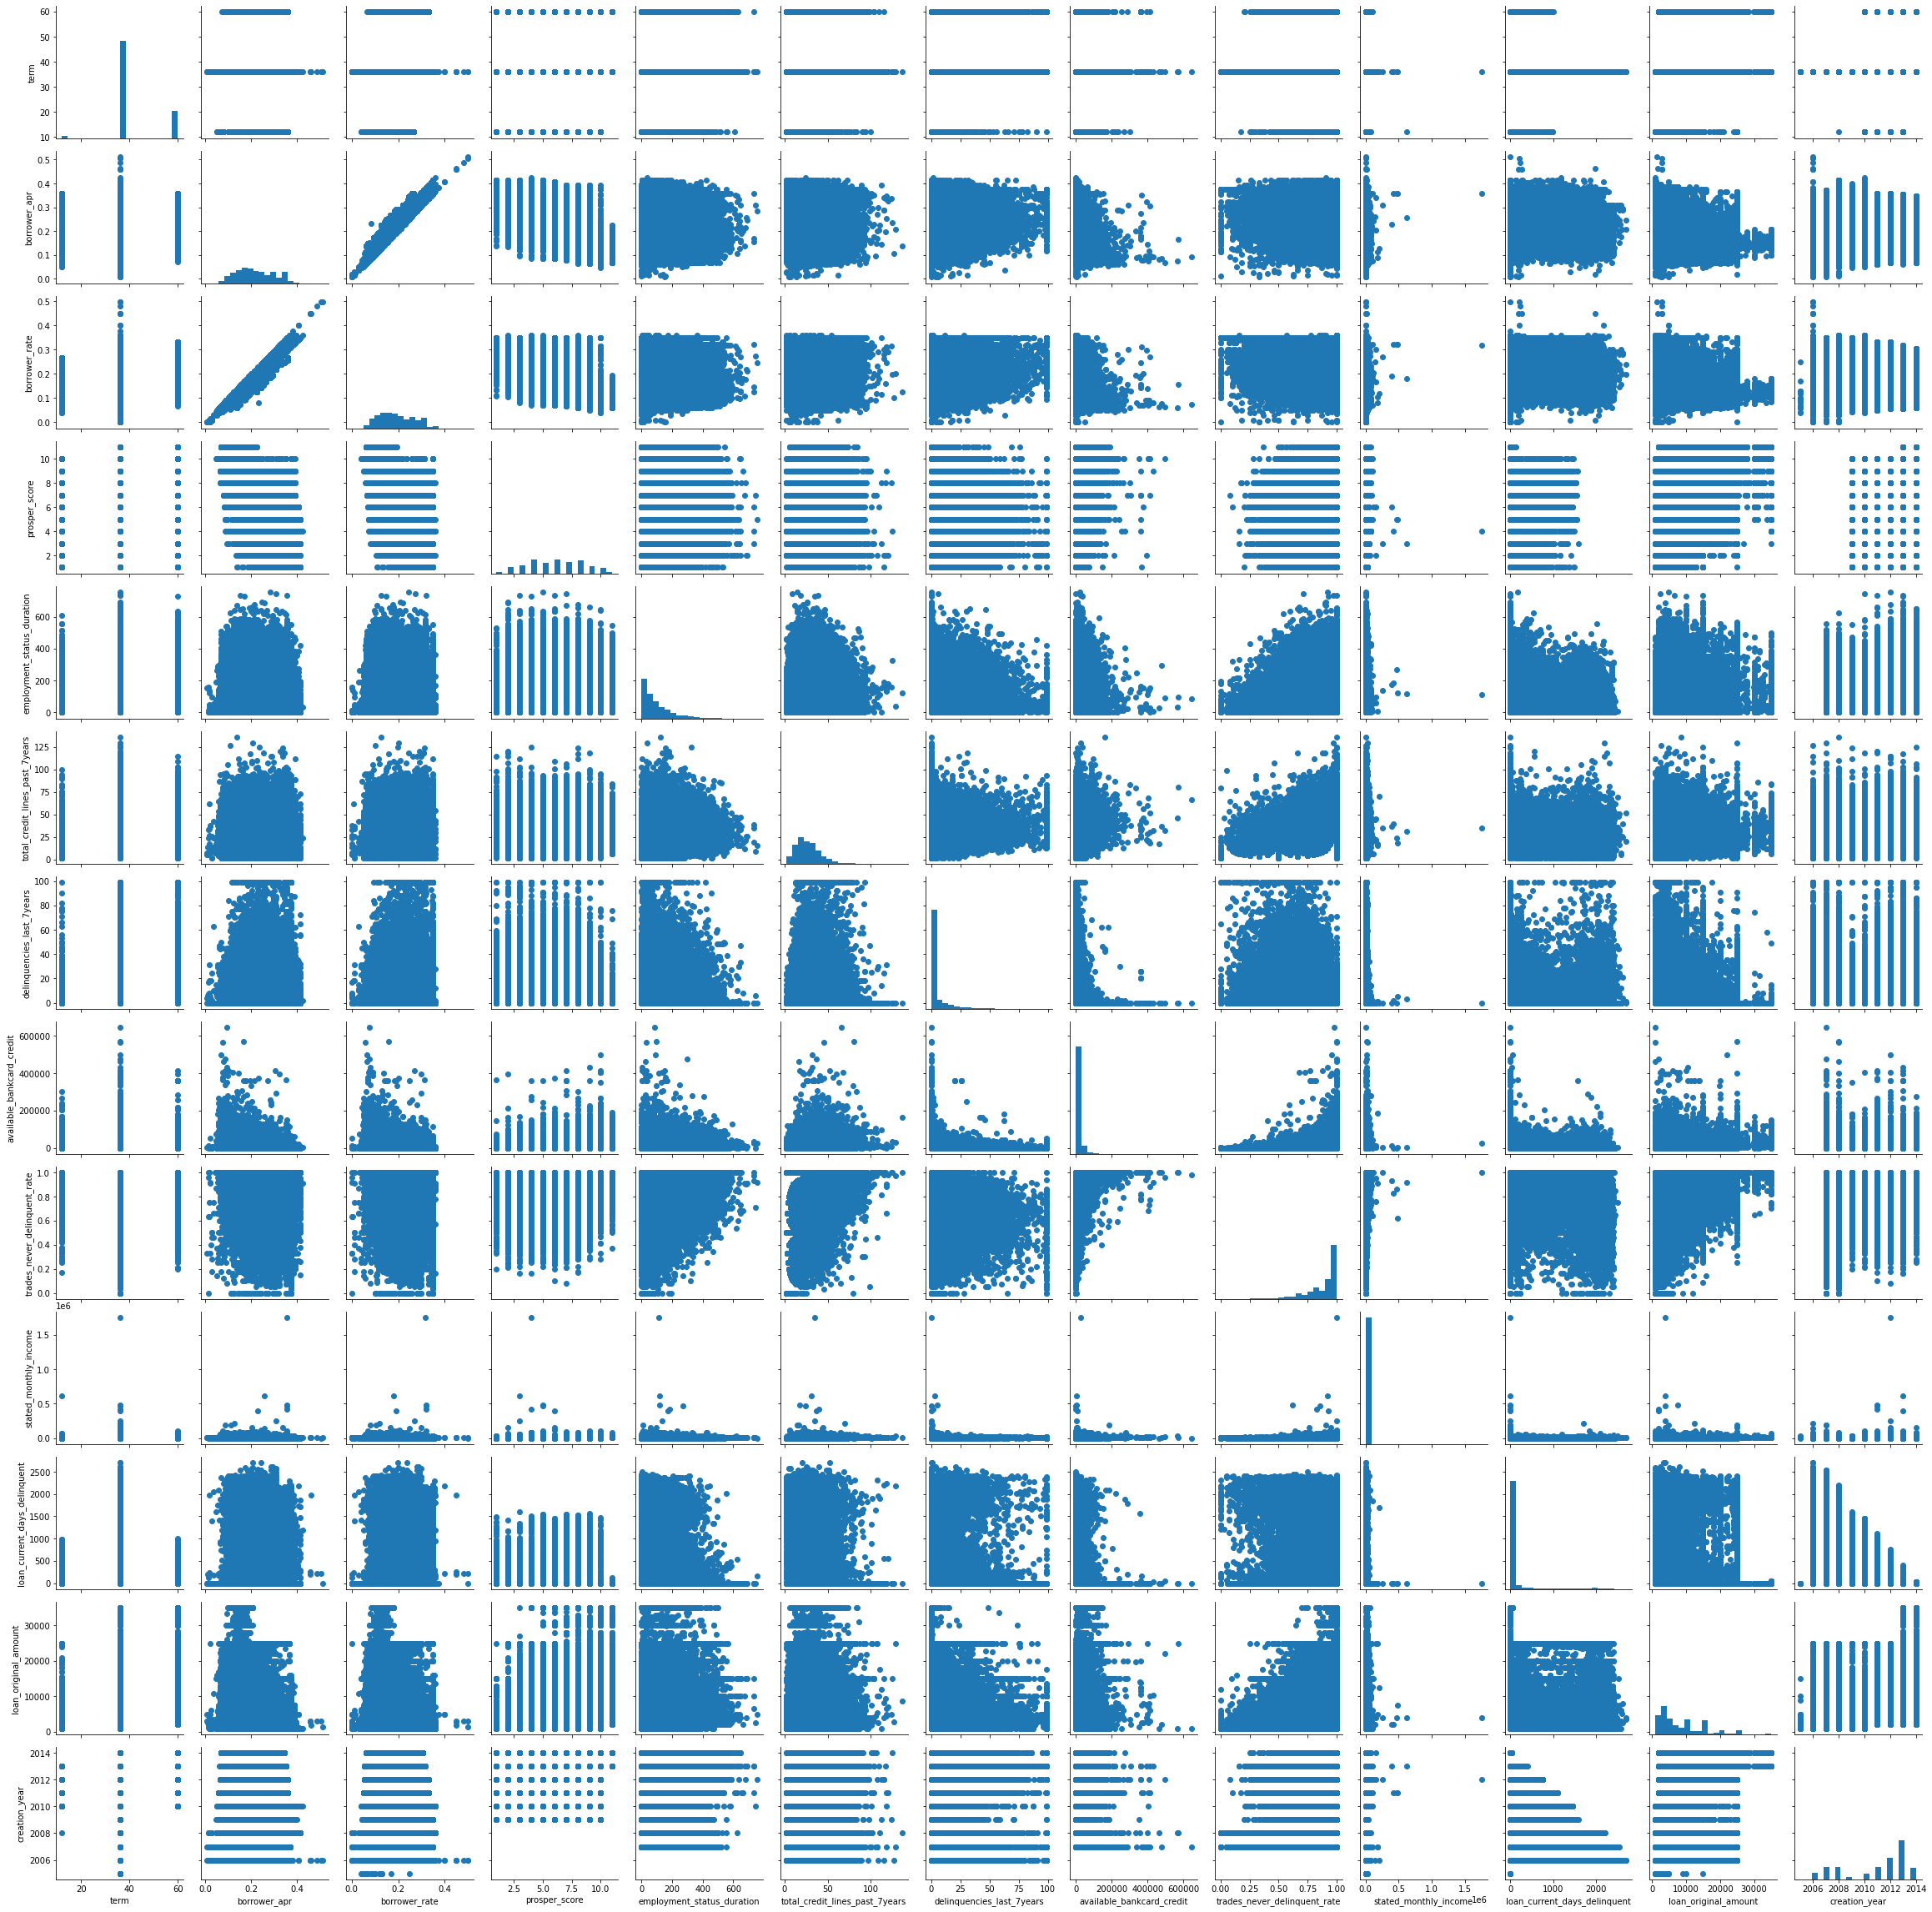

In [34]:
non_numeric_variables = ['listing_creation_date', 'loan_status', 'listing_category', 'occupation',
                         'employment_status', 'is_borrower_homeowner', 'income_range', 'income_verifiable', 'loan_key']

numeric_variables = [var for var in loans.columns.tolist() if var not in non_numeric_variables]

g = sb.PairGrid(data=loans, vars=numeric_variables)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

At first glance, the numeric variables of this dataset does not have any strong correlation. The only variables with an almost linear correlation are `borrower_rate` and `borrower_apr`, but as they are really related, it is not a surprise, and does not add any interesting information for the study.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The first discovery in the dataset was that between the 21 listed categories, the average amount lent is not so different between them, decreasing gradually from around $8,000 for the highest category (debt consolidation) to around $4,000 in the lowest category (student use).

When looking at the past due status crossed with the categories (leaving "debt consolidation" out to analyse the other categories better), we can see another interesting fact: although the category "Not available" is the second with most loans, it is the one with less loans with past due status, alongside with "RV". It is hard to better understand why, as we do not have more information about this kind of loans.

If we plot the count of loan status per income range, there is another fact we can see: the different income ranges have similar distribution of status, not showing much difference between them about who is a better borrower. The exception here is the income range "Not displayed", that has zero past due loans, but still have a significant amount of completed loans.

I also took a look in how the prosper score is related to the income range, to see if there is any effect. The first thing to note is that the "violins" keep growing and shrinking at integer numbers for most of the classes, showing a discrete behavior. Also and most importantly, if we look at the medians, they have 3 different values that grows with the income range, meaning that prospers with higher incomes have better scores. Also, the forth quartile is raised as well, but the second quartile is almost static between the different ranges, raising only at the highest one.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Although it is a very interesting dataset to deal with, I could not find any other big relationship between the variables studied until now. If we take a close look to the grid made above, we can se that most of the numeric variables does not have any strong correlation, as the data points are very disperse.

## Multivariate Exploration

My first interest is in how the different categories variated through the years, if they had any common behavior.

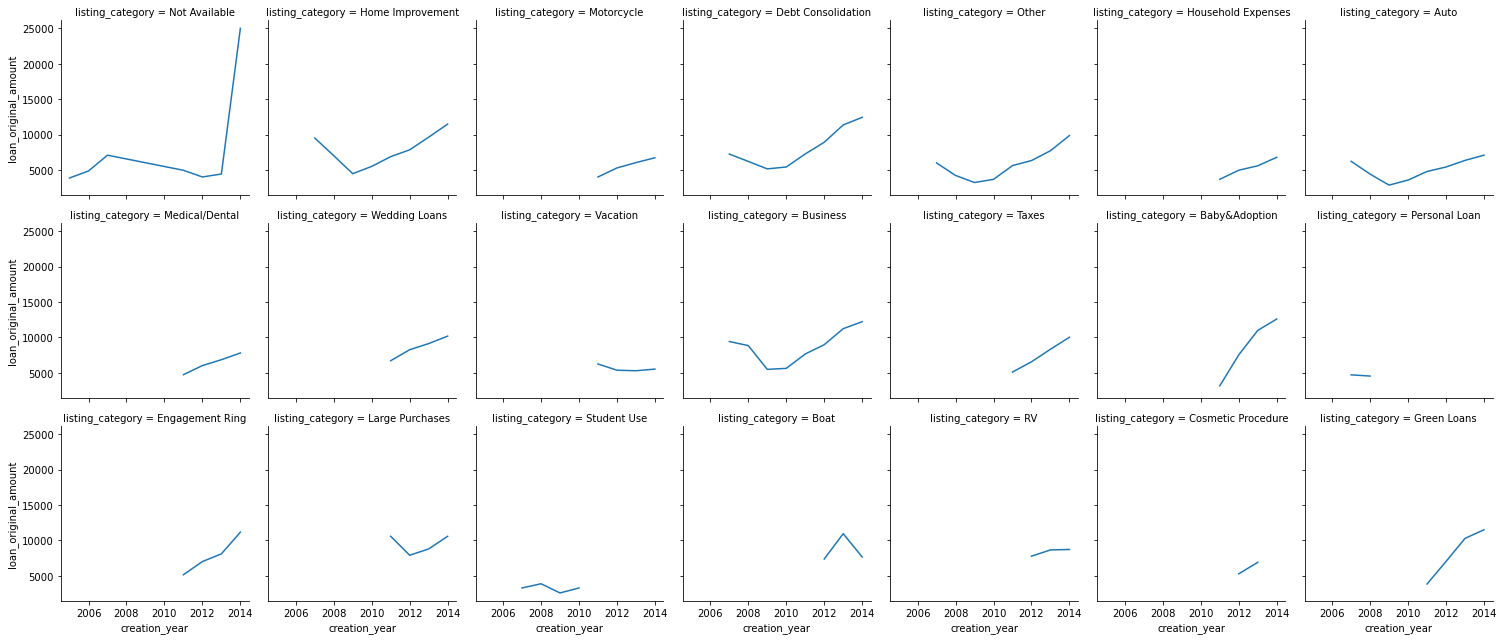

In [35]:
g = sb.FacetGrid(data=loans, col='listing_category', col_wrap=7)
g.map(sb.lineplot, 'creation_year', 'loan_original_amount', ci=None);

Through the multiple visualizations above, we can see that most of the categories have a reduction in the average money lent between 2007 and 2009, but increases constantly after that year. Also, another fact is that most of the categories are not constant during the years on the dataset, the only exception is the category "Not Available" that is present in every single year. The other five categories that are present in most of the years are "home improvement", "debt consolidation", "other", "auto" and "business". The rest of them are present in two or three years only.

Now we can see a similar visualization for the income range, and see if is there any interesting insight we can take from it. As the number of income ranges are smaller, we can try seeing everything at once instead of a grid.

<AxesSubplot:xlabel='creation_year', ylabel='loan_original_amount'>

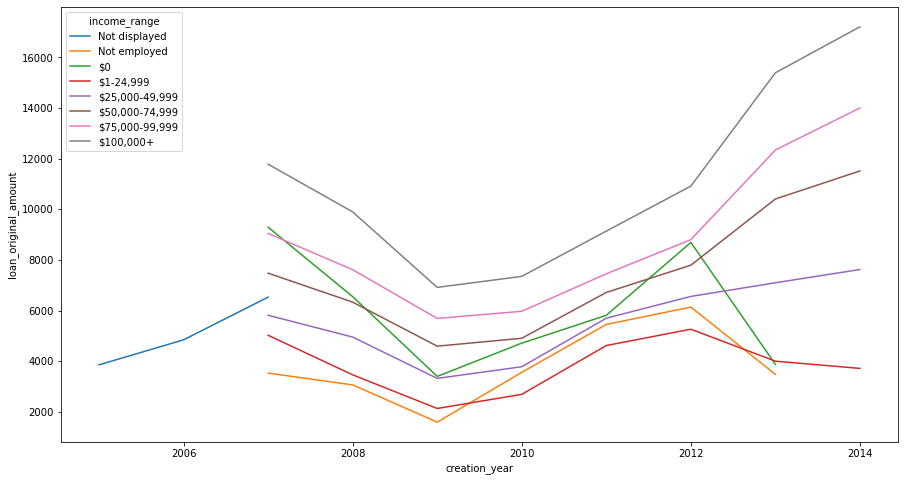

In [36]:
plt.figure(figsize=(15, 8))
sb.lineplot(data=loans, x='creation_year', y='loan_original_amount', hue='income_range', ci=None)

An interesting fact is shown when we see this plot: as expected, the higher the income range of the borrower, the higher is the average amount lent. The only exception here is with the income range $0, it starts in 2007 as the second highest average amount, then drops to forth, and raises back on 2012 to third. This is hard to explain without further data if those are errors in the dataset, a default value for who does not have income stated, but it should raise an alert flag for risk area to check what is happening with these data. Also, from the start of the dataset until 2007 we have no income ranges available.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It seems that the category of the loan does not have a big influence in the amount lent, as we saw throughout the years, as they all share similar behaviors. But this common behavior can be an indicative that the year, and therefore, the economical and financial situation of people have a big influence in how much money they are asking. As stated in an early visualization, the economical crisis of 2007/08 could impact the loans, and we can clearly see this happening in both visualizations: the average amount reduces from 2007 to 2009, and start to raise again after, as people start to recover the money and trust on economy.

Also, there seems to be a correlation between the income range and the average amount of money borrowed, as the ranges have parallels lines in the chart with very similar behavior. The only exception observed is with the range $0, that can be problems with the input in the system or missing information about the borrowers that were set to the default income range.

### Were there any interesting or surprising interactions between features?

For me, the most interesting interaction was how the average amount changes between years, as already stated. In both visualizations is clear that people are borrowing more os less money depending on the year, probably being related about the economy in that year.

## Conclusions

Throughout this study, we could explore some interesting facts about a dataset of loans. We were able to see the distribution of the loans between the statuses, how people tend to pay overdue loans on the period between 15 and 29 days after the deadline. Also, we saw how the loans were distributed in the 8 years of the dataset, relating it with income range, prosper score, listing category, and other available variables in the dataset.

Although I changed a little the direction of the study while doing it, it lead me to an interesting finding: the amount of money borrowed seems to be related to the year when the loan was created. It is not an easy feature to be used as a predictor, because the main reason appears not to be related with the numeric year itself, but what was happening in the economy during that year: crisis and good periods can reflect a lot in the average amount borrowed.